In [3]:
%reset -f

In [189]:
# Setting the figure size to a bigger one than the default
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from sklearn import linear_model
from sklearn.metrics import root_mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

from sklearn import neighbors
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, HuberRegressor, RANSACRegressor, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time
from sklearn.feature_selection import SelectKBest, f_regression
from imblearn.pipeline import Pipeline as ImbPipeline
import pickle
from sklearn.model_selection import cross_validate, cross_val_score

import os

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


# Load Data and first glance with pandas

In [5]:
# Read about the dataset here https://samyzaf.com/ML/song_year/song_year.html

# Load the data from the file
# data = pd.read_csv('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/YearPredictionMSD.csv')

features = ['year', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't1 9', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28', 't29', 't30', 't31', 't32', 't33', 't34', 't35', 't36 ', 't37', 't38', 't39', 't40', 't41', 't42', 't43', 't44', 't45', 't46', 't47', 't48', 't49', 't50', 't51', 't52', 't53' , 't54', 't55', 't56', 't57', 't58', 't59', 't60', 't61', 't62', 't63', 't64', 't65', 't66', 't67', 't68', 't69', 't70', 't71', 't72', 't73', 't74', 't75', 't76', 't77', 't78', 't79', 't80', 't81', 't82', 't83', 't84', 't85', 't86', 't87', 't88', 't89', 't90']

# Load the data from the file
data = pd.read_csv('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/YearPredictionMSD.csv'
                , header=0
                  , names=features
                   )

# First look at the dataset
print(data.info())  
print(data.describe())  
print(data.head())

# If you want to see the total number of missing values in the entire dataset
total_missing_values = data.isna().sum().sum()
print(f"Total number of missing values in the dataset: {total_missing_values}")

# Convert to numpy array
data = data.to_numpy()


# Extract features (X) and labels (y)
X = data[:, 1:]
y = data[:, 0]   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    50000 non-null  int64  
 1   t1      50000 non-null  float64
 2   t2      50000 non-null  float64
 3   t3      50000 non-null  float64
 4   t4      50000 non-null  float64
 5   t5      50000 non-null  float64
 6   t6      50000 non-null  float64
 7   t7      50000 non-null  float64
 8   t8      50000 non-null  float64
 9   t9      50000 non-null  float64
 10  t10     50000 non-null  float64
 11  t11     50000 non-null  float64
 12  t12     50000 non-null  float64
 13  t13     50000 non-null  float64
 14  t14     50000 non-null  float64
 15  t15     50000 non-null  float64
 16  t16     50000 non-null  float64
 17  t17     50000 non-null  float64
 18  t18     50000 non-null  float64
 19  t1 9    50000 non-null  float64
 20  t20     50000 non-null  float64
 21  t21     50000 non-null  float64
 22

# Visualize

Data Shape:  (50000, 91)
X Shape:  (50000, 90)
y Shape:  (50000,)


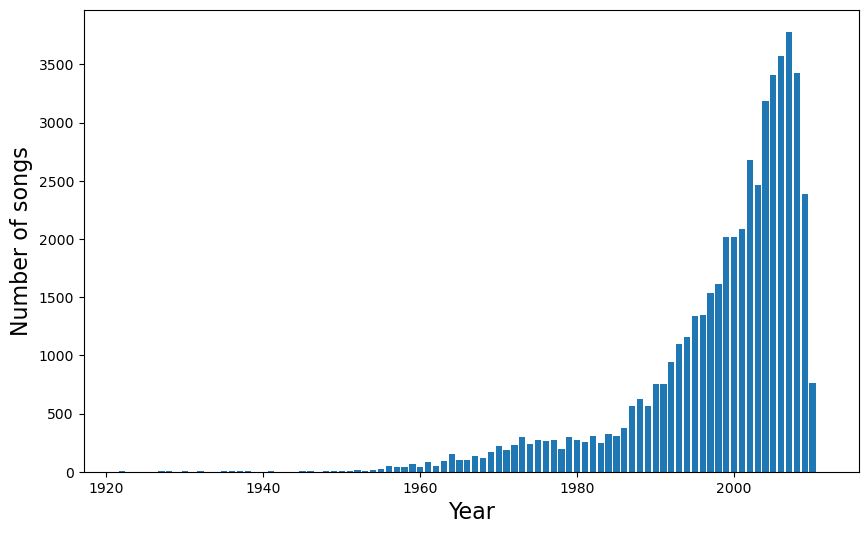

In [6]:
# Print shapes
print("Data Shape: ", data.shape)
print("X Shape: ", X.shape)
print("y Shape: ", y.shape)

# Number of songs per year
years = np.arange(1922, 2012)
nsongs = np.array([np.sum(y == year) for year in years])

# Bar plot
plt.bar(years, nsongs, align='center')
plt.xlabel("Year")
plt.ylabel("Number of songs")
plt.show()

# Split in Train, validate and test

In [7]:

# split the data in training, validation and test sets
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size = 0.1, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 0.1, random_state=7)

print('# training samples: ', X_train.shape[0])
print('# validation samples: ', X_val.shape[0])
print('# test samples: ', X_test.shape[0])

# training samples:  40500
# validation samples:  4500
# test samples:  5000


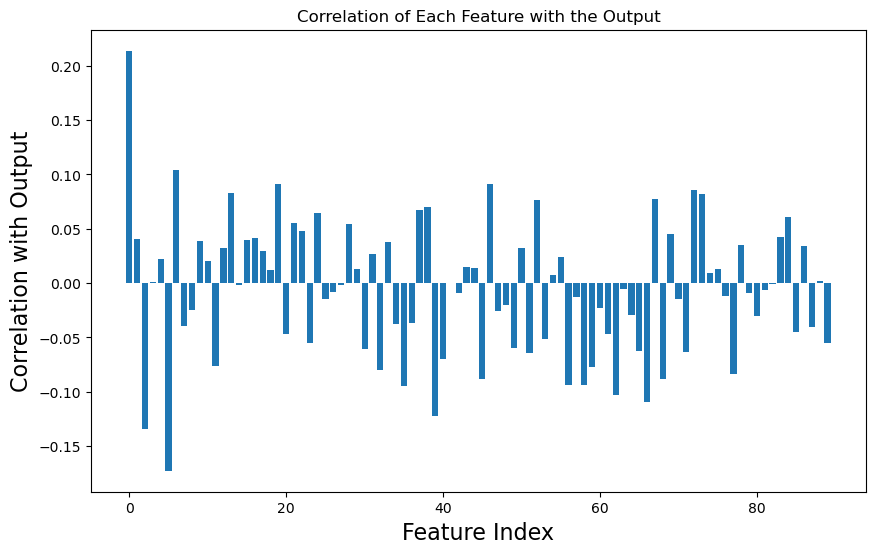

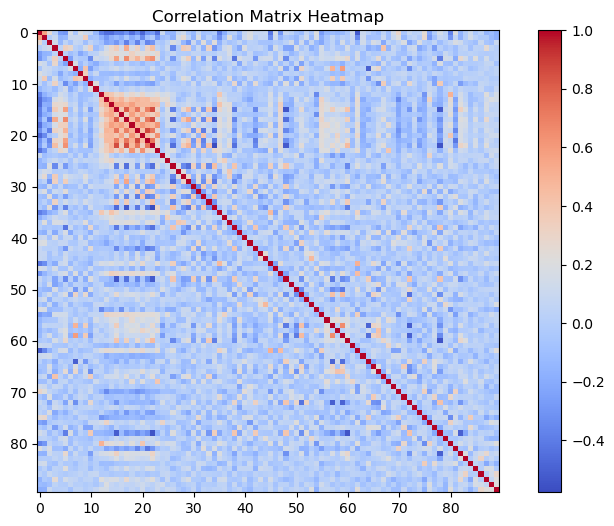

In [8]:
# Compute the correlation between each feature in X_train and y_train
correlations = []
for i in range(X_train.shape[1]):
  corr, _ = pearsonr(X_train[:, i], y_train)
  correlations.append(corr)


# Plot the correlations
plt.bar(range(len(correlations)), correlations)
plt.xlabel('Feature Index')
plt.ylabel('Correlation with Output')
plt.title('Correlation of Each Feature with the Output')
plt.show()

# Compute the correlation matrix
corr_matrix = np.corrcoef(X_train, rowvar=False)

# Plot the heatmap
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix Heatmap')
plt.show()



Filtered correlations:  [ 0.2138639  -0.13378628 -0.1726307  -0.12262817]
Filtered indexes:  [ 0  2  5 39]


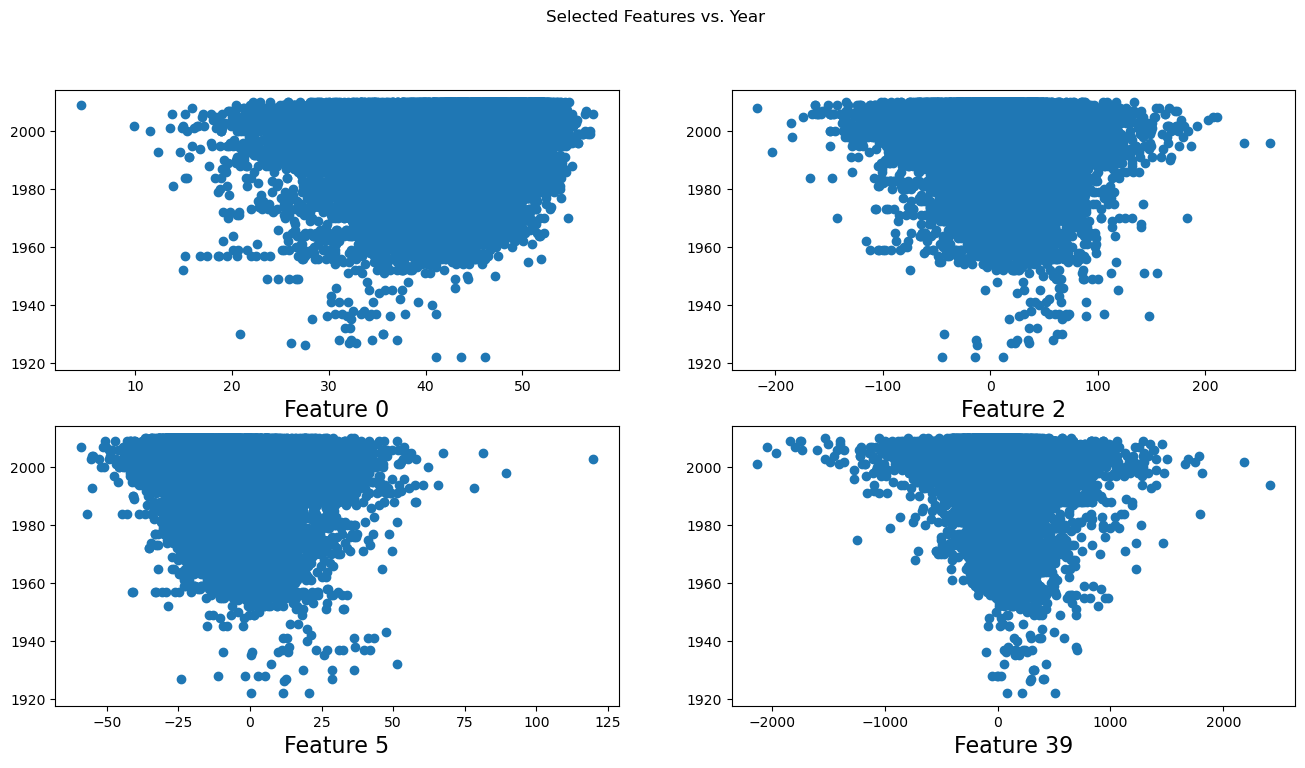

In [54]:
# Convert the list to a numpy array for easier handling
correlations = np.array(correlations)

# Filter correlations with a threshold of 0.1
threshold = 0.12
filtered_indices = np.where(np.abs(correlations) >= threshold)[0]
filtered_correlations = correlations[filtered_indices]

print("Filtered correlations: ", filtered_correlations)
print("Filtered indexes: ", filtered_indices)


plt.figure(figsize=(16, 8))
plt.suptitle('Selected Features vs. Year')
for i, feature_index in enumerate(filtered_indices):
  plt.subplot(2, 2, i+1)
  plt.scatter(X_train[:,feature_index],y_train)
  plt.xlabel(f'Feature {feature_index}')

# Screening of models

In [10]:
def screen_model(model):
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('model', model)
    ])
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    end_time = time.time()

    y_val_pred = pipeline.predict(X_val)
    
    rmse = root_mean_squared_error(y_val, y_val_pred)
    mae = np.mean(np.abs(y_val - y_val_pred))
    r2 = r2_score(y_val, y_val_pred)
    medae = np.median(np.abs(y_val - y_val_pred))

    print(f'Model: {model}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'R2: {r2 * 100:.2f}%')
    print(f'MedAE: {medae:.2f}')
    print(f'Fitting Time: {end_time - start_time:.2f} s')
    print('')

    return {
        'MSE': rmse,
        'MAE': mae,
        'R2': r2,
        'MedAE': medae,
        'Fitting Time': end_time - start_time
    }

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'Huber': HuberRegressor(),
    'RANSAC': RANSACRegressor(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN': neighbors.KNeighborsRegressor()
}


In [11]:
screening_results = {}

for model_name, model in models.items():
    screening_results[model_name] = screen_model(model)



Model: LinearRegression()
RMSE: 9.55
MAE: 6.97
R2: 17.14%
MedAE: 5.32
Fitting Time: 0.16 s

Model: Ridge()
RMSE: 9.55
MAE: 6.97
R2: 17.14%
MedAE: 5.32
Fitting Time: 0.08 s

Model: Lasso()
RMSE: 10.19
MAE: 7.59
R2: 5.66%
MedAE: 6.34
Fitting Time: 0.10 s

Model: ElasticNet()
RMSE: 10.02
MAE: 7.43
R2: 8.75%
MedAE: 6.11
Fitting Time: 0.09 s

Model: HuberRegressor()
RMSE: 9.84
MAE: 6.73
R2: 12.06%
MedAE: 4.68
Fitting Time: 0.60 s

Model: RANSACRegressor()
RMSE: 36.33
MAE: 25.34
R2: -1099.23%
MedAE: 18.20
Fitting Time: 0.43 s

Model: SVR()
RMSE: 9.36
MAE: 6.15
R2: 20.43%
MedAE: 3.97
Fitting Time: 125.17 s

Model: RandomForestRegressor()
RMSE: 9.40
MAE: 7.01
R2: 19.66%
MedAE: 5.46
Fitting Time: 226.12 s

Model: GradientBoostingRegressor()
RMSE: 9.36
MAE: 6.77
R2: 20.32%
MedAE: 5.09
Fitting Time: 84.34 s

Model: KNeighborsRegressor()
RMSE: 9.40
MAE: 6.68
R2: 19.66%
MedAE: 4.80
Fitting Time: 0.07 s



# Hyperparameter tuning

### Pipeline and scoring for all Gridsearchs

In [15]:
# Ensure hyperparameter_tuning returns a tuple
def hyperparameter_tuning(model, param_grid):
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('model', model)
    ])

    scoring_metrics = {
        'MSE': 'neg_mean_squared_error',
        'MAE': 'neg_mean_absolute_error',
        'MedAE': 'neg_median_absolute_error',
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                               scoring=scoring_metrics, refit='MAE', verbose=3,
                               return_train_score=True,
                               n_jobs=6,
                               pre_dispatch='2*n_jobs')

    grid_search.fit(X_train, y_train)

    print("Best model:", grid_search.best_estimator_)
    print("Best hyperparameters:", grid_search.best_params_)

    return grid_search.best_estimator_, grid_search.best_params_, grid_search.cv_results_

### Gridsearch for Ridge

In [16]:
model = Ridge()
param_grid = {
    'model__alpha': [0.1, 1, 10, 100]
}

best_model, best_params, cv_results = hyperparameter_tuning(model, param_grid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 2/5] END model__alpha=0.1; MAE: (train=-7.116, test=-7.146) MSE: (train=-95.299, test=-97.444) MedAE: (train=-5.478, test=-5.506) total time=   0.1s
[CV 1/5] END model__alpha=0.1; MAE: (train=-7.132, test=-7.162) MSE: (train=-95.809, test=-96.952) MedAE: (train=-5.478, test=-5.481) total time=   0.1s
[CV 4/5] END model__alpha=0.1; MAE: (train=-7.088, test=-7.230) MSE: (train=-95.281, test=-96.582) MedAE: (train=-5.431, test=-5.557) total time=   0.1s
[CV 3/5] END model__alpha=0.1; MAE: (train=-7.151, test=-7.156) MSE: (train=-95.920, test=-96.977) MedAE: (train=-5.482, test=-5.498) total time=   0.1s
[CV 5/5] END model__alpha=0.1; MAE: (train=-7.140, test=-7.001) MSE: (train=-96.235, test=-92.322) MedAE: (train=-5.494, test=-5.383) total time=   0.1s
[CV 1/5] END model__alpha=1; MAE: (train=-7.132, test=-7.162) MSE: (train=-95.809, test=-96.952) MedAE: (train=-5.478, test=-5.481) total time=   0.1s
[CV 4/5] END model__alph

# Gridsearch for Lasso

In [17]:
model = Lasso()
param_grid = {
    'model__alpha': [0.1, 1, 10, 100]
}

best_model, best_params, cv_results = hyperparameter_tuning(model, param_grid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END model__alpha=0.1; MAE: (train=-7.164, test=-7.190) MSE: (train=-96.589, test=-97.832) MedAE: (train=-5.590, test=-5.598) total time=   0.2s
[CV 2/5] END model__alpha=0.1; MAE: (train=-7.150, test=-7.184) MSE: (train=-96.104, test=-98.270) MedAE: (train=-5.541, test=-5.619) total time=   0.2s
[CV 3/5] END model__alpha=0.1; MAE: (train=-7.182, test=-7.171) MSE: (train=-96.740, test=-97.532) MedAE: (train=-5.607, test=-5.535) total time=   0.2s
[CV 4/5] END model__alpha=0.1; MAE: (train=-7.124, test=-7.256) MSE: (train=-96.053, test=-97.167) MedAE: (train=-5.534, test=-5.665) total time=   0.2s
[CV 5/5] END model__alpha=0.1; MAE: (train=-7.166, test=-7.027) MSE: (train=-96.918, test=-92.919) MedAE: (train=-5.567, test=-5.499) total time=   0.2s
[CV 1/5] END model__alpha=1; MAE: (train=-7.651, test=-7.716) MSE: (train=-107.752, test=-109.786) MedAE: (train=-6.293, test=-6.355) total time=   0.2s
[CV 2/5] END model__al

# GridSearch for ElasticNet

In [18]:
model = ElasticNet()
param_grid = {
    'model__alpha': [0.1, 1, 10, 100],
    'model__l1_ratio': [0.1, 0.5, 0.9]
}

best_model, best_params, cv_results = hyperparameter_tuning(model, param_grid)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END model__alpha=0.1, model__l1_ratio=0.1; MAE: (train=-7.147, test=-7.182) MSE: (train=-96.070, test=-97.380) MedAE: (train=-5.553, test=-5.545) total time=   0.1s
[CV 2/5] END model__alpha=0.1, model__l1_ratio=0.1; MAE: (train=-7.134, test=-7.166) MSE: (train=-95.588, test=-97.691) MedAE: (train=-5.538, test=-5.573) total time=   0.1s
[CV 4/5] END model__alpha=0.1, model__l1_ratio=0.1; MAE: (train=-7.105, test=-7.244) MSE: (train=-95.572, test=-96.833) MedAE: (train=-5.479, test=-5.651) total time=   0.2s
[CV 3/5] END model__alpha=0.1, model__l1_ratio=0.1; MAE: (train=-7.166, test=-7.160) MSE: (train=-96.186, test=-97.060) MedAE: (train=-5.568, test=-5.537) total time=   0.2s
[CV 5/5] END model__alpha=0.1, model__l1_ratio=0.1; MAE: (train=-7.159, test=-7.016) MSE: (train=-96.533, test=-92.555) MedAE: (train=-5.563, test=-5.442) total time=   0.2s
[CV 1/5] END model__alpha=0.1, model__l1_ratio=0.5; MAE: (train=-7.15

# Gridsearch for Huber

In [21]:
model = HuberRegressor()
param_grid = {
    'model__alpha': [0.0001, 0.001, 0.01],
    'model__epsilon': [1.35, 1.5, 2.0]
}

best_model, best_params, cv_results = hyperparameter_tuning(model, param_grid)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 2/5] END model__alpha=0.0001, model__epsilon=1.35; MAE: (train=-6.788, test=-6.807) MSE: (train=-100.852, test=-103.215) MedAE: (train=-4.685, test=-4.646) total time=   0.9s
[CV 5/5] END model__alpha=0.0001, model__epsilon=1.35; MAE: (train=-6.803, test=-6.685) MSE: (train=-101.927, test=-97.529) MedAE: (train=-4.655, test=-4.617) total time=   0.9s
[CV 1/5] END model__alpha=0.0001, model__epsilon=1.35; MAE: (train=-6.794, test=-6.873) MSE: (train=-101.582, test=-103.333) MedAE: (train=-4.682, test=-4.693) total time=   1.0s
[CV 4/5] END model__alpha=0.0001, model__epsilon=1.35; MAE: (train=-6.759, test=-6.877) MSE: (train=-100.990, test=-101.934) MedAE: (train=-4.618, test=-4.777) total time=   0.9s
[CV 3/5] END model__alpha=0.0001, model__epsilon=1.35; MAE: (train=-6.824, test=-6.791) MSE: (train=-101.531, test=-101.975) MedAE: (train=-4.710, test=-4.666) total time=   1.0s
[CV 1/5] END model__alpha=0.0001, model__epsil

# Gridsearch SVR

In [27]:
model = SVR()
param_grid= {
    'model__C': [0.1, 1.0, 10.0],
    'model__kernel': ['rbf'],
    'model__gamma': ['scale']
    }

best_model, best_params, cv_results = hyperparameter_tuning(model, param_grid)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 5/5] END model__C=0.1, model__gamma=scale, model__kernel=rbf; MAE: (train=-6.585, test=-6.476) MSE: (train=-102.355, test=-97.938) MedAE: (train=-4.270, test=-4.206) total time= 3.0min
[CV 3/5] END model__C=0.1, model__gamma=scale, model__kernel=rbf; MAE: (train=-6.586, test=-6.584) MSE: (train=-101.813, test=-101.877) MedAE: (train=-4.267, test=-4.266) total time= 3.1min
[CV 2/5] END model__C=0.1, model__gamma=scale, model__kernel=rbf; MAE: (train=-6.561, test=-6.615) MSE: (train=-100.919, test=-103.937) MedAE: (train=-4.264, test=-4.286) total time= 3.1min
[CV 1/5] END model__C=0.1, model__gamma=scale, model__kernel=rbf; MAE: (train=-6.565, test=-6.686) MSE: (train=-101.541, test=-104.422) MedAE: (train=-4.243, test=-4.330) total time= 3.1min
[CV 4/5] END model__C=0.1, model__gamma=scale, model__kernel=rbf; MAE: (train=-6.534, test=-6.687) MSE: (train=-101.371, test=-102.573) MedAE: (train=-4.213, test=-4.388) total time

### Gridsearch for KNN

In [29]:
model = neighbors.KNeighborsRegressor()
param_grid = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]
}

best_model, best_params, cv_results = hyperparameter_tuning(model, param_grid)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 5/5] END model__n_neighbors=3, model__p=1, model__weights=uniform; MAE: (train=-4.808, test=-7.028) MSE: (train=-49.623, test=-100.843) MedAE: (train=-3.000, test=-5.000) total time=  10.9s
[CV 3/5] END model__n_neighbors=3, model__p=1, model__weights=uniform; MAE: (train=-4.747, test=-7.114) MSE: (train=-48.378, test=-103.058) MedAE: (train=-3.000, test=-5.000) total time=  11.1s
[CV 1/5] END model__n_neighbors=3, model__p=1, model__weights=uniform; MAE: (train=-4.789, test=-7.134) MSE: (train=-48.728, test=-103.242) MedAE: (train=-3.000, test=-5.000) total time=  10.9s
[CV 4/5] END model__n_neighbors=3, model__p=1, model__weights=uniform; MAE: (train=-4.761, test=-7.128) MSE: (train=-48.474, test=-101.891) MedAE: (train=-3.000, test=-5.000) total time=  10.9s
[CV 2/5] END model__n_neighbors=3, model__p=1, model__weights=uniform; MAE: (train=-4.831, test=-6.945) MSE: (train=-49.337, test=-99.896) MedAE: (train=-3.333, te

# Best Huber with poly2

In [31]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', HuberRegressor(alpha=0.001, epsilon=1.35, max_iter=1000))
])

start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()

y_val_pred = pipeline.predict(X_val)

rmse = root_mean_squared_error(y_val, y_val_pred)
mae = np.mean(np.abs(y_val - y_val_pred))
medae = np.median(np.abs(y_val - y_val_pred))

print(f'Model: Polynomial Regression')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')


Model: Polynomial Regression
RMSE: 9.90
MAE: 6.67


# Cross - Validation

In [37]:
# Function to perform cross-validation for Ridge regression with polynomial features
def cross_validate_model(model):
    
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)

    scoring_metrics = {
        'MSE': 'neg_mean_squared_error',
        'MAE': 'neg_mean_absolute_error',
        'MedAE': 'neg_median_absolute_error',
    }

    scores = cross_validate(pipeline, X_train_and_val, y_train_and_val, cv=5, 
                            scoring=scoring_metrics, return_train_score=True,
                            verbose=3,
                            n_jobs=6,
                            pre_dispatch='2*n_jobs')
    
    return scores
      


### Cross-Validation: Huber

In [60]:
model = HuberRegressor(alpha=0.001, epsilon=1.35)
cross_scores_huber = cross_validate_model(model)

cross_scores_huber_test_MAE = np.mean(cross_scores_huber['test_MAE'])
cross_scores_huber_test_MSE = np.mean(cross_scores_huber['test_MSE'])
cross_scores_huber_test_MedAE = np.mean(cross_scores_huber['test_MedAE'])

print('MAE')
print(cross_scores_huber_test_MAE)
print('MSE')
print(cross_scores_huber_test_MSE)
print('MedAE')
print(cross_scores_huber_test_MedAE)


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


[CV] END  MAE: (train=-6.802, test=-6.692) MSE: (train=-101.292, test=-98.018) MedAE: (train=-4.683, test=-4.637) total time=   1.1s
[CV] END  MAE: (train=-6.789, test=-6.764) MSE: (train=-101.088, test=-98.713) MedAE: (train=-4.673, test=-4.709) total time=   1.0s
[CV] END  MAE: (train=-6.753, test=-6.877) MSE: (train=-99.746, test=-104.043) MedAE: (train=-4.642, test=-4.721) total time=   1.1s
[CV] END  MAE: (train=-6.762, test=-6.923) MSE: (train=-99.722, test=-105.338) MedAE: (train=-4.676, test=-4.735) total time=   1.1s
[CV] END  MAE: (train=-6.790, test=-6.708) MSE: (train=-101.047, test=-98.213) MedAE: (train=-4.669, test=-4.625) total time=   1.2s
-6.792497582206979
-100.86490331220163
-4.685462946225971


[Parallel(n_jobs=6)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.8s
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    1.2s finished


### Cross-Validation: SVR

In [38]:
model = SVR(C=10.0, gamma='scale', kernel='rbf')
scores = cross_validate_model(model)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


[CV] END  MAE: (train=-4.683, test=-5.954) MSE: (train=-66.984, test=-81.445) MedAE: (train=-2.345, test=-3.969) total time=11.0min
[CV] END  MAE: (train=-4.636, test=-6.206) MSE: (train=-65.951, test=-89.077) MedAE: (train=-2.321, test=-4.037) total time=11.2min


[Parallel(n_jobs=6)]: Done   2 out of   5 | elapsed: 15.6min remaining: 23.5min


[CV] END  MAE: (train=-4.686, test=-6.004) MSE: (train=-67.406, test=-82.388) MedAE: (train=-2.328, test=-3.941) total time=11.2min
[CV] END  MAE: (train=-4.678, test=-5.948) MSE: (train=-67.140, test=-81.595) MedAE: (train=-2.343, test=-3.824) total time=11.5min
[CV] END  MAE: (train=-4.660, test=-6.080) MSE: (train=-66.509, test=-86.305) MedAE: (train=-2.331, test=-3.908) total time=11.7min


[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed: 16.0min finished


### Cross-Validation: KNN

In [62]:
model = neighbors.KNeighborsRegressor(n_neighbors=7, p=2, weights='uniform')
cross_scores_KNN = cross_validate_model(model)


cross_scores_KNN_test_MAE = np.mean(cross_scores_KNN['test_MAE'])
cross_scores_KNN_test_MSE = np.mean(cross_scores_KNN['test_MSE'])
cross_scores_KNN_test_MedAE = np.mean(cross_scores_KNN['test_MedAE'])

print('MAE')
print(cross_scores_KNN_test_MAE)
print('MSE')
print(cross_scores_KNN_test_MSE)
print('MedAE')
print(cross_scores_KNN_test_MedAE)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


[CV] END  MAE: (train=-5.819, test=-6.893) MSE: (train=-65.905, test=-93.010) MedAE: (train=-4.143, test=-5.000) total time=   2.1s
[CV] END  MAE: (train=-5.855, test=-6.717) MSE: (train=-67.359, test=-87.243) MedAE: (train=-4.143, test=-4.857) total time=   2.3s
[CV] END  MAE: (train=-5.824, test=-6.828) MSE: (train=-66.629, test=-91.753) MedAE: (train=-4.143, test=-4.857) total time=   2.3s
[CV] END  MAE: (train=-5.844, test=-6.770) MSE: (train=-67.086, test=-88.334) MedAE: (train=-4.286, test=-5.000) total time=   2.1s


[Parallel(n_jobs=6)]: Done   2 out of   5 | elapsed:   10.4s remaining:   15.6s


[CV] END  MAE: (train=-5.829, test=-6.735) MSE: (train=-66.443, test=-88.655) MedAE: (train=-4.143, test=-4.857) total time=   2.1s
MAE
-6.788647619047618
MSE
-89.79901315192745
MedAE
-4.914285714285734


[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:   10.9s finished


# Tests

In [66]:
def test_model(model):
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('model', model)
    ])

    start_time = time.time()
    pipeline.fit(X_train_and_val, y_train_and_val)
    fitting_time = start_time - time.time()

    start_time = time.time()
    y_test_pred = pipeline.predict(X_test)
    predicting_time = start_time - time.time()

    rmse = root_mean_squared_error(y_test, y_test_pred)
    mae = np.mean(np.abs(y_test - y_test_pred))
    medae = np.median(np.abs(y_test - y_test_pred))

    print(f'Model: {model}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'MedAE: {medae:.2f}')
    print(f'Fitting Time: {fitting_time:.2f} s')
    print(f'Predicting Time: {predicting_time:.2f} s')
    print('')

    return {
        'RMSE': rmse,
        'MAE': mae,
        'MedAE': medae,
        'Fitting Time': fitting_time,
        'Predicting Time': predicting_time
    }

### Test for SVR

In [42]:
model = SVR(C=10.0, gamma='scale', kernel='rbf')
svr_results = test_model(model)

Model: SVR(C=10.0)
RMSE: 8.92
MAE: 5.91
MedAE: 3.89
Fitting Time: -638.19 s
Predicting Time: -26.90 s



### Test for Huber

In [72]:
model = HuberRegressor(alpha=0.001, epsilon=1.35)
huber_results = test_model(model)

Model: HuberRegressor(alpha=0.001)
RMSE: 9.90
MAE: 6.76
MedAE: 4.67
Fitting Time: -0.91 s
Predicting Time: -0.00 s



### Test for KNN

In [73]:
model = neighbors.KNeighborsRegressor(n_neighbors=7, p=2, weights='uniform')
knn_results = test_model(model)

Model: KNeighborsRegressor(n_neighbors=7)
RMSE: 9.24
MAE: 6.70
MedAE: 5.00
Fitting Time: -0.08 s
Predicting Time: -0.44 s



# Logistic Regression for CIFAR-10

## Load of Dataset and random images

In [96]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

cifar_dataset_batch1 = unpickle('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/cifar-10-batches-py/data_batch_1')
# cifar_dataset_batch2 = unpickle('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/cifar-10-batches-py/data_batch_2')
# cifar_dataset_batch3 = unpickle('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/cifar-10-batches-py/data_batch_3')
# cifar_dataset_batch4 = unpickle('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/cifar-10-batches-py/data_batch_4')
# cifar_dataset_batch5 = unpickle('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/cifar-10-batches-py/data_batch_5')
metadata = unpickle('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/cifar-10-batches-py/batches.meta')

# Extract data and labels
data = cifar_dataset_batch1[b'data']
labels = cifar_dataset_batch1[b'labels']
label_names = metadata[b'label_names']

label_names = [label.decode('utf-8') for label in label_names]


# Print the size of the data and labels
print('Data size: %d,%d ' % (data.shape[0], data.shape[1]))




Data size: 10000,3072 


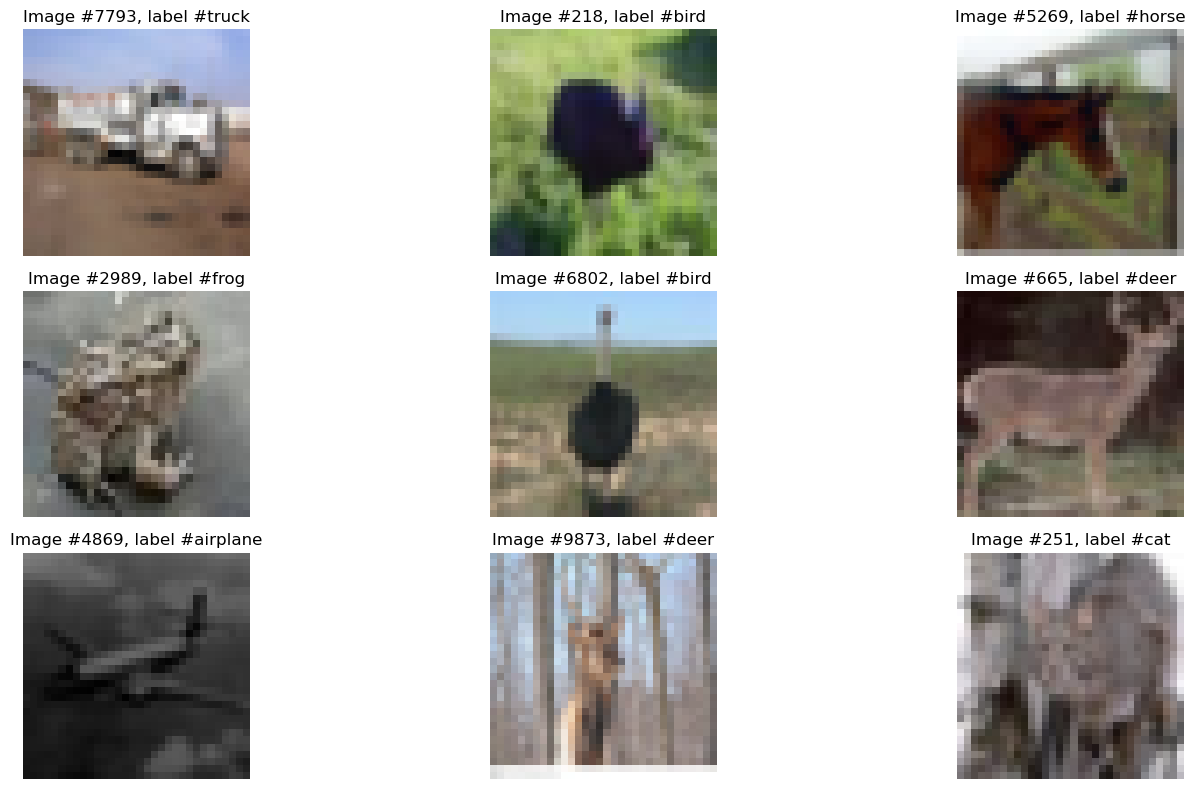

In [115]:
# Show some random training samples in a 4x4 subplot
num_random_samples = 9
random_samples = np.random.randint(0, data.shape[0], num_random_samples)
data_images = data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

plt.figure(figsize=(16, 8))
for i, random_sample_i in enumerate(random_samples):
    plt.subplot(3, 3, i+1)
    imi = data_images[random_sample_i]
    figtitle = "Image #%d, label #%s" % (random_sample_i, label_names[labels[random_sample_i]])
    plt.imshow(imi)
    plt.title(figtitle)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Split 

In [118]:
data = data/ 255.0

 # split the data in training, validation and test sets
data_train_and_val, data_test, labels_train_and_val, labels_test = train_test_split(data, labels, test_size = 0.1, random_state=5)
data_train, data_val, labels_train, labels_val = train_test_split(data_train_and_val, labels_train_and_val, test_size = 0.1, random_state=7)

print('# training samples: ', data_train.shape[0])
print('# validation samples: ', data_val.shape[0])
print('# test samples: ', data_test.shape[0])

# training samples:  8100
# validation samples:  900
# test samples:  1000


# Screening of models

In [163]:
def screen_logistic_regression_model(model_class, n_components=0.95, **model_params):
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n_components)),
        ('model',model_class(**model_params))
    ])
    start_time = time.time()
    pipeline.fit(data_train, labels_train)
    end_time = time.time()

    labels_val_pred = pipeline.predict(data_val)
    
    accuracy = accuracy_score(labels_val, labels_val_pred)
    f1 = f1_score(labels_val, labels_val_pred, average='macro')
    precision = precision_score(labels_val, labels_val_pred, average='macro')
    recall = recall_score(labels_val, labels_val_pred, average='macro')

    print(f'Model: Logistic Regression')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'F1: {f1:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'Fitting Time: {end_time - start_time:.2f} s')
    print('')

    #Confusion Matrix
    cm = confusion_matrix(labels_val, labels_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Create a ConfusionMatrixDisplay object
    disp.plot() # Plot the confusion matrix
    #plot title: the name of the model
    plt.title("Confusion Matrix:")
    plt.show() # Show the plot



    return {
        'Accuracy': accuracy,
        'F1': f1,
        'Precision': precision,
        'Recall': recall,
        'Fitting Time': end_time - start_time
    }

Model: Logistic Regression
Accuracy: 0.37
F1: 0.37
Precision: 0.37
Recall: 0.37
Fitting Time: 21.98 s



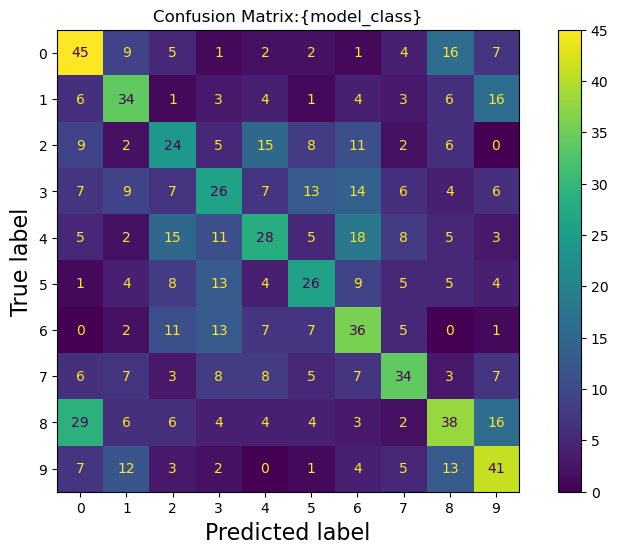

{'Accuracy': 0.3688888888888889,
 'F1': 0.3676066532364545,
 'Precision': 0.3686814629269596,
 'Recall': 0.3720033815988552,
 'Fitting Time': 21.97557020187378}

In [164]:
screen_logistic_regression_model(LogisticRegression, max_iter=1000)


Model: Logistic Regression
Accuracy: 0.46
F1: 0.46
Precision: 0.46
Recall: 0.46
Fitting Time: 29.40 s



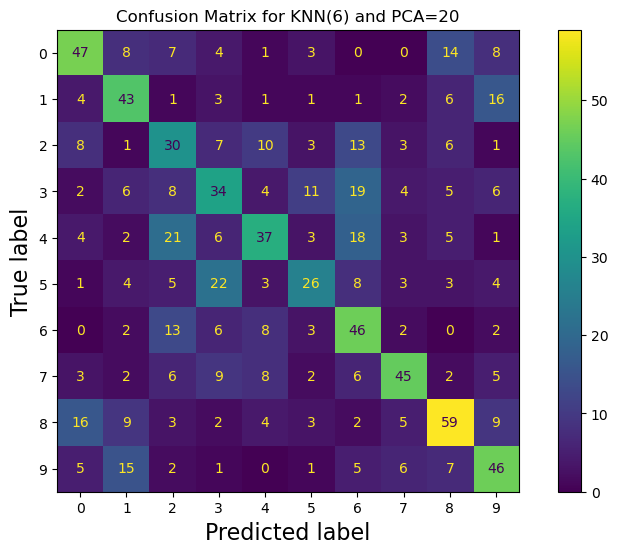

{'Accuracy': 0.4588888888888889,
 'F1': 0.4569858510449663,
 'Precision': 0.4642001962678374,
 'Recall': 0.45924057756537245,
 'Fitting Time': 29.399982690811157}

In [159]:
screen_logistic_regression_model(SVC)


Model: Logistic Regression
Accuracy: 0.31
F1: 0.30
Precision: 0.39
Recall: 0.31
Fitting Time: 28.11 s



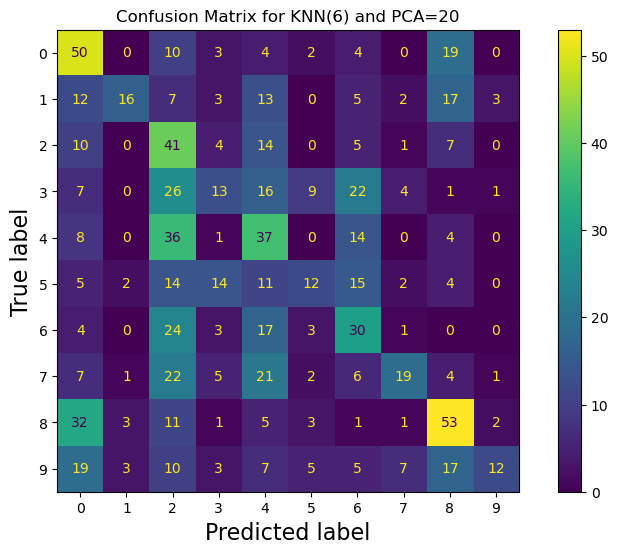

{'Accuracy': 0.31444444444444447,
 'F1': 0.2983306973804942,
 'Precision': 0.3863262384596805,
 'Recall': 0.3093159003011715,
 'Fitting Time': 28.111610889434814}

In [160]:
screen_logistic_regression_model(KNeighborsClassifier)

Model: Logistic Regression
Accuracy: 0.35
F1: 0.34
Precision: 0.35
Recall: 0.34
Fitting Time: 40.01 s



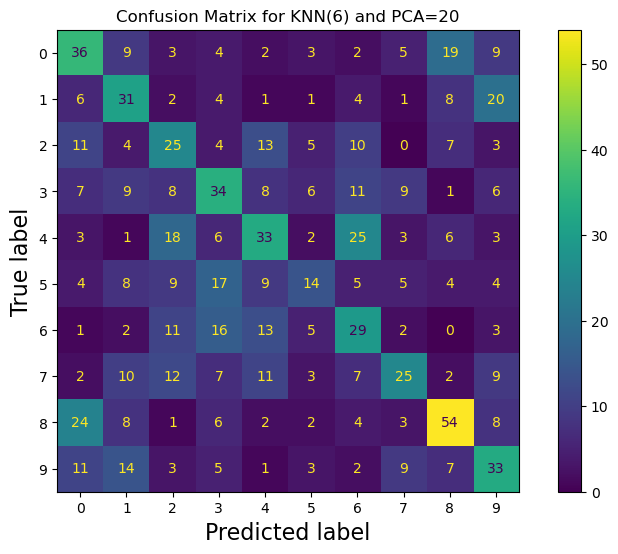

{'Accuracy': 0.3488888888888889,
 'F1': 0.3414928368998398,
 'Precision': 0.3473520348454927,
 'Recall': 0.3439160130169366,
 'Fitting Time': 40.01061296463013}

In [161]:
screen_logistic_regression_model(RandomForestClassifier)

Model: Logistic Regression
Accuracy: 0.39
F1: 0.39
Precision: 0.39
Recall: 0.39
Fitting Time: 56.40 s



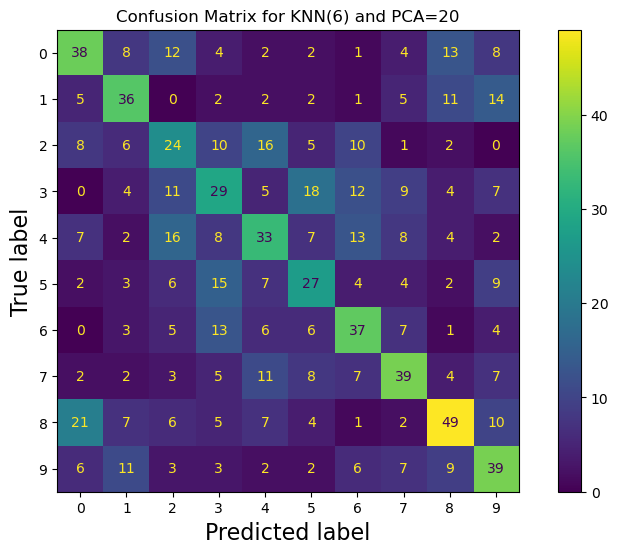

{'Accuracy': 0.39,
 'F1': 0.38920834731270365,
 'Precision': 0.38901535641751595,
 'Recall': 0.3907049460015385,
 'Fitting Time': 56.39504098892212}

In [162]:
screen_logistic_regression_model(MLPClassifier)

# Gridsearch

In [180]:
def gridsearch_regression_model(model, param_grid):
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('pca', PCA()),
        ('model', model)
    ])

    scoring_metrics = {
        'Accuracy': 'accuracy',
        'F1': 'f1_macro',
        'Precision': 'precision_macro',
        'Recall': 'recall_macro'
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                               scoring=scoring_metrics, refit='F1', verbose=3,
                               return_train_score=True,
                               n_jobs=6,
                               pre_dispatch='2*n_jobs')

    grid_search.fit(data_train, labels_train)

    print("Best model:", grid_search.best_estimator_)
    print("Best hyperparameters:", grid_search.best_params_)

    return grid_search.best_estimator_, grid_search.best_params_, grid_search.cv_results_

### Gridsearch for MLPC

In [181]:
model = MLPClassifier(max_iter=1000)

param_grid = {
    'pca__n_components': [0.9, 0.95, 0.99],
    'model__hidden_layer_sizes': [(50,), (100,), (50, 50)],
}

best_estimator_mlpc, best_params_mlpc, grid_results_mlpc = gridsearch_regression_model(model, param_grid)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV 2/5] END model__hidden_layer_sizes=(50,), pca__n_components=0.9; Accuracy: (train=0.867, test=0.356) F1: (train=0.867, test=0.356) Precision: (train=0.868, test=0.356) Recall: (train=0.868, test=0.356) total time= 1.3min
[CV 1/5] END model__hidden_layer_sizes=(50,), pca__n_components=0.9; Accuracy: (train=0.878, test=0.338) F1: (train=0.878, test=0.338) Precision: (train=0.879, test=0.339) Recall: (train=0.878, test=0.339) total time= 1.3min
[CV 1/5] END model__hidden_layer_sizes=(50,), pca__n_components=0.95; Accuracy: (train=1.000, test=0.339) F1: (train=1.000, test=0.339) Precision: (train=1.000, test=0.341) Recall: (train=1.000, test=0.339) total time= 1.3min
[CV 4/5] END model__hidden_layer_sizes=(50,), pca__n_components=0.9; Accuracy: (train=0.875, test=0.350) F1: (train=0.876, test=0.349) Precision: (train=0.876, test=0.349) Recall: (train=0.876, test=0.351) total time= 1.3min
[CV 5/5] END model__hidden_layer_sizes=(50,), pca__n_components=0.9; Accuracy: (train=0.881, test=0

/Users/ignaciopastorebenaim/anaconda3/envs/CVISEnv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:412: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


Best model: Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('model', MLPClassifier(max_iter=1000))])
Best hyperparameters: {'model__hidden_layer_sizes': (100,), 'pca__n_components': 0.95}


### Gridsearch for SVC

In [172]:
model= SVC()
param_grid= {
    'pca__n_components': [0.9, 0.95, 0.99],
    'model__C': [0.1, 1.0, 10.0],
    'model__kernel': ['rbf'],
    'model__gamma': ['scale']
    }

best_estimator, best_params, cv_results = gridsearch_regression_model(SVC, param_grid)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV 5/5] END model__C=0.1, model__gamma=scale, model__kernel=rbf, pca__n_components=0.9; Accuracy: (train=0.403, test=0.355) F1: (train=0.396, test=0.348) Precision: (train=0.410, test=0.357) Recall: (train=0.403, test=0.355) total time= 1.3min
[CV 4/5] END model__C=0.1, model__gamma=scale, model__kernel=rbf, pca__n_components=0.9; Accuracy: (train=0.402, test=0.356) F1: (train=0.390, test=0.345) Precision: (train=0.421, test=0.365) Recall: (train=0.401, test=0.355) total time= 1.3min
[CV 2/5] END model__C=0.1, model__gamma=scale, model__kernel=rbf, pca__n_components=0.9; Accuracy: (train=0.403, test=0.367) F1: (train=0.394, test=0.356) Precision: (train=0.417, test=0.379) Recall: (train=0.403, test=0.366) total time= 1.3min
[CV 3/5] END model__C=0.1, model__gamma=scale, model__kernel=rbf, pca__n_components=0.9; Accuracy: (train=0.405, test=0.372) F1: (train=0.395, test=0.359) Precision: (train=0.421, test=0.386) Recall: (train=0.404, test=0.370) total time= 1.3min
[CV 1/5] END model__

# Cross Validation for Classification

In [202]:
# Function to perform cross-validation for Ridge regression with polynomial features
def cross_validate_model_for_classification(model):
    
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('model', model)
    ])
    print(f'start of fitting')
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    fitting_time = time.time() - start_time
    print(f'Fitting Time: {fitting_time:.2f} s')


    scoring_metrics = {
        'Accuracy': 'accuracy',
        'F1': 'f1_macro',
        'Precision': 'precision_macro',
        'Recall': 'recall_macro'
    }

    print(f'start of cross_val_score')
    start_time = time.time()
    cross_val_results = cross_validate(pipeline, data_train_and_val, labels_train_and_val, cv=5,
                            scoring=scoring_metrics,
                            verbose=3,
                            n_jobs=6,
                            pre_dispatch='2*n_jobs')
    cross_val_time = time.time() - start_time
    

    mean_accuracy = np.mean(cross_val_results['test_Accuracy'])
    mean_f1 = np.mean(cross_val_results['test_F1'])
    mean_precision = np.mean(cross_val_results['test_Precision'])
    mean_recall = np.mean(cross_val_results['test_Recall'])

   
    print(f'Model: {model}')
    print(f"Mean cross-validation accuracy: {mean_accuracy}")
    print(f"Mean cross-validation F1 score: {mean_f1}")
    print(f"Mean cross-validation precision: {mean_precision}")
    print(f"Mean cross-validation recall: {mean_recall}")
    print(f'Cross Validation Time: {cross_val_time:.2f} s')


    return {
        'Mean Accuracy': mean_accuracy,
        'Mean F1': mean_f1,
        'Mean Precision': mean_precision,
        'Mean Recall': mean_recall,
        'Fitting Time': fitting_time,
        'Cross Validation Time': cross_val_time
    }

### Cross validation for best SVM

In [203]:
model = SVC(C=1, gamma='scale', kernel='rbf')
cross_validate_scores_SVM = cross_validate_model_for_classification(model)



start of fitting
Fitting Time: 232.40 s
start of cross_val_score


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


[CV] END  Accuracy: (test=0.447) F1: (test=0.446) Precision: (test=0.450) Recall: (test=0.447) total time= 1.4min
[CV] END  Accuracy: (test=0.473) F1: (test=0.470) Precision: (test=0.471) Recall: (test=0.473) total time= 1.4min
[CV] END  Accuracy: (test=0.462) F1: (test=0.460) Precision: (test=0.463) Recall: (test=0.462) total time= 1.4min
[CV] END  Accuracy: (test=0.462) F1: (test=0.461) Precision: (test=0.465) Recall: (test=0.462) total time= 1.4min
[CV] END  Accuracy: (test=0.447) F1: (test=0.443) Precision: (test=0.444) Recall: (test=0.446) total time= 1.4min


[Parallel(n_jobs=6)]: Done   2 out of   5 | elapsed:  1.4min remaining:  2.2min
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:  1.5min finished


Model: SVC(C=1)
Mean cross-validation accuracy: 0.458111111111111
Mean cross-validation F1 score: 0.45605915266060054
Mean cross-validation precision: 0.45865030759223835
Mean cross-validation recall: 0.457977258652946
Cross Validation Time: 87.13 s


### Cross validation for best MLP

In [204]:
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

cross_validate_scores_MLP = cross_validate_model_for_classification(model)

start of fitting
Fitting Time: 301.51 s
start of cross_val_score


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


[CV] END  Accuracy: (test=0.399) F1: (test=0.399) Precision: (test=0.400) Recall: (test=0.399) total time= 1.3min
[CV] END  Accuracy: (test=0.372) F1: (test=0.372) Precision: (test=0.373) Recall: (test=0.371) total time= 1.3min


[Parallel(n_jobs=6)]: Done   2 out of   5 | elapsed:  1.4min remaining:  2.0min


[CV] END  Accuracy: (test=0.386) F1: (test=0.386) Precision: (test=0.388) Recall: (test=0.385) total time= 1.3min
[CV] END  Accuracy: (test=0.369) F1: (test=0.369) Precision: (test=0.370) Recall: (test=0.370) total time= 1.3min
[CV] END  Accuracy: (test=0.366) F1: (test=0.366) Precision: (test=0.366) Recall: (test=0.366) total time= 1.3min
Model: MLPClassifier(max_iter=1000)
Mean cross-validation accuracy: 0.37855555555555553
Mean cross-validation F1 score: 0.3784023226572848
Mean cross-validation precision: 0.3794611043302078
Mean cross-validation recall: 0.3782198414927832
Cross Validation Time: 82.19 s


[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:  1.4min finished


# Test SVM

In [ ]:
#train with all the data and measure the test performance
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

cifar_dataset_batch1 = unpickle('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/cifar-10-batches-py/data_batch_1')
# cifar_dataset_batch2 = unpickle('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/cifar-10-batches-py/data_batch_2')
# cifar_dataset_batch3 = unpickle('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/cifar-10-batches-py/data_batch_3')
# cifar_dataset_batch4 = unpickle('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/cifar-10-batches-py/data_batch_4')
# cifar_dataset_batch5 = unpickle('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/cifar-10-batches-py/data_batch_5')
metadata = unpickle('/Users/ignaciopastorebenaim/Documents/MGRCV/TPs/ML/Lab1/data/cifar-10-batches-py/batches.meta')

# Extract data and labels
data = cifar_dataset_batch1[b'data']
labels = cifar_dataset_batch1[b'labels']
label_names = metadata[b'label_names']

label_names = [label.decode('utf-8') for label in label_names]


# Print the size of the data and labels
print('Data size: %d,%d ' % (data.shape[0], data.shape[1]))
